In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%run imports.py

Succesfully imported libraries and modules



In [2]:
ts = np.linspace(0, 5, 1000)
f = 5 # Hz

x_base = np.sin(2 * np.pi * f * ts)

x_complex = np.zeros_like(ts)
for q in range(1, 4):
    x_complex += 1/q * np.sin(2 * np.pi * q * f * ts)

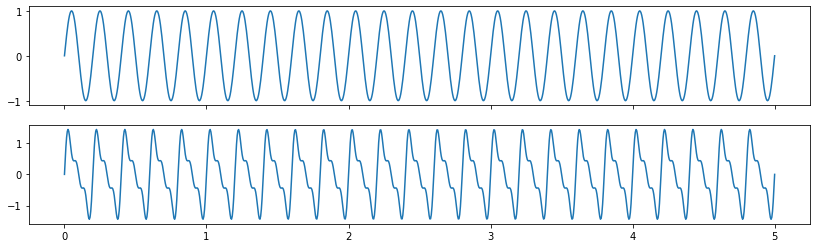

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(14, 4), sharex=True)

ax = axes[0]
ax.plot(ts, x_base)

ax = axes[1]
ax.plot(ts, x_complex)

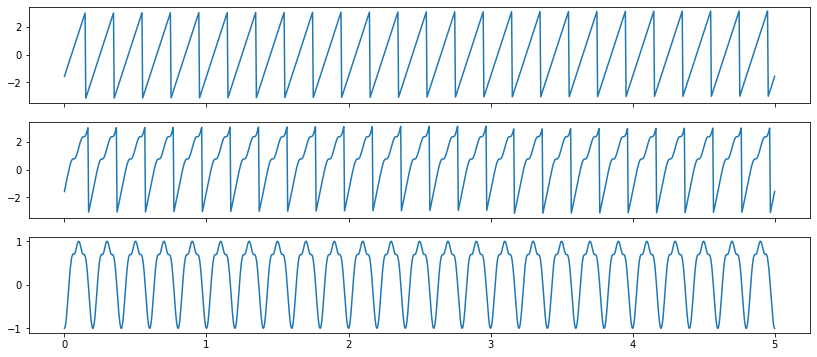

In [8]:
phase_base = np.angle(signal.hilbert(x_base))
phase_complex = np.angle(signal.hilbert(x_complex))

fig, axes = plt.subplots(3, 1, figsize=(14, 6), sharex=True)

ax = axes[0]
ax.plot(ts, phase_base)

ax = axes[1]
ax.plot(ts, phase_complex)

ax = axes[2]
ax.plot(ts, np.sin(phase_complex))

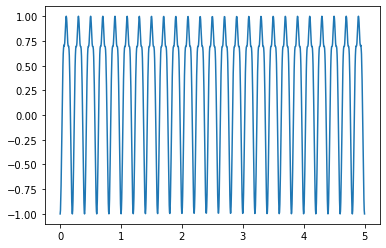

In [48]:
def generate_coupled_nonsinusoidal_signal(f_p, f_a, K_p, K_a, xi, timepoints, n_sinusoids=4, noise_level=0.1, noise_type='pink', alpha=1):
    """
    Return x with shape of timepoints
    f_p, f_a - frequencies for coupled oscillations
    K_p and K_a are default amplitudes for phase and amplitude coupled oscillations
    xi is coupling strength. The closer to 0, the stronger is phase-amplitude modulation
    noise_type: pink, white-gaussian, white-uniform
    alpha: recommended from 1 to 3 - coefficient for power law distribution noise (pink)
    
    """
    #x_fp = K_p * np.sin(2 * np.pi * f_p * timepoints)
    x_fp = K_p * np.sum(np.array([1/q * np.sin(2 * np.pi * q * f_p * timepoints) for q in range(1, n_sinusoids+1)]), axis=0)
    fp_phase = np.angle(signal.hilbert(x_fp))
    A_fa = K_a/2 * ((1 - xi) * np.cos(fp_phase) + xi + 1) # dividing by K_p to acquire "signal" phase
    x_fa = A_fa * np.sin(2 * np.pi * f_a * timepoints)
    
    n = len(timepoints)
    
    if noise_type == 'white-gaussian':
        noise = np.random.normal(scale=noise_level, size=n)
    
    if noise_type == 'white-uniform':
        noise = np.random.uniform(low=-noise_level, high=noise_level, size=n)
        
    if noise_type == 'pink':
        noise = np.random.normal(scale=noise_level, size=n)
        
        noise_spectrum = fft(noise)
        freqs = fftfreq(n, timepoints[1] - timepoints[0])

        oneOverF = np.insert((1/(freqs[1:]**alpha)), 0, 0)
        new_spectrum = oneOverF * noise_spectrum                    
        noise = np.abs(ifft(new_spectrum))    
    
    x = x_fp + x_fa + noise
    
    return x

In [59]:
ts = np.linspace(0, 10, 10000)
x = generate_coupled_nonsinusoidal_signal(10, 200, 1/10, 1/50, 
                                          xi=0.01, 
                                          timepoints=ts, 
                                          n_sinusoids=6, 
                                          noise_level=0)

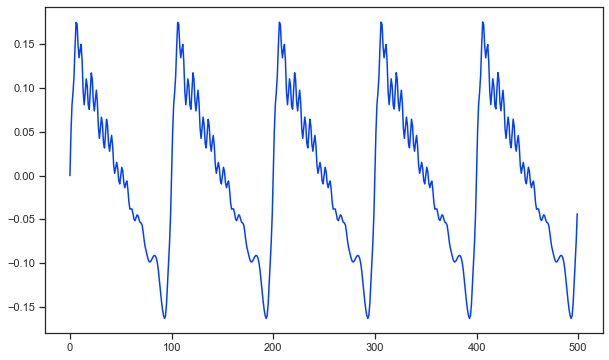

In [60]:
plt.plot(x[:500])

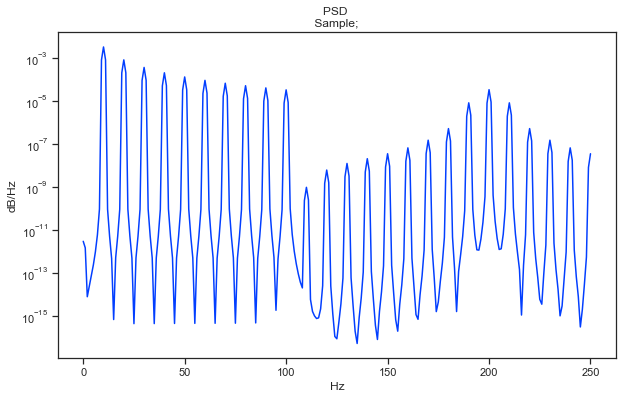

In [58]:
lfp_test = LFP(x, 1000)

lfp_test.show_psd((0, 250), log=True)

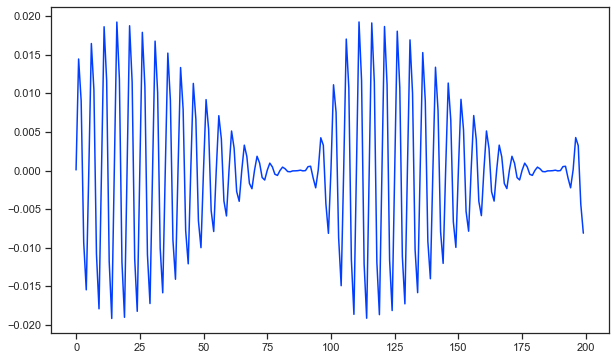

In [69]:
lfp_test.bp_filter(150, 250).plot(0, 0.2)

In [70]:
beta_params = (5, 40, 1, 3)
hfo_params = (40, 300, 10, 0)

pac = MyPAC(beta_params, hfo_params, use_numba=True)

In [84]:
pac.filter_fit_surrogates(lfp_test, n_surrogates=500, n_splits=2)

---Creating and estimating PAC on 500 surrogates---
---Filtering out phases and amplitudes components for PAC estimation---
Low frequency band filter params: start = 5 Hz, stop = 40 Hz, step = 1 Hz, bw = 3 Hz
High frequency band filter params: start = 40 Hz, stop = 300 Hz, step = 10 Hz, bw = 0 Hz
PHASE: LFP_Sample___10.0
AMPLITUDE: LFP_Sample___10.0
[UPDATED] self.name:  PAC_Sample____10.0 sec
[UPDATED: self.lfp_phase; self.lfp_amplitude]
---Variable amplitude filter bandwidth---
[UPDATED: self.beta_matrix; self.hfo_matrix]
---Finished filtering; elapsed time 1.04 sec---
---Starting PAC estimation using MI method---
[UPDATED: self.pac_matrix]
Creating 500 surrogates
USING NO-PYTHON
NOT USING FUTURES MULTIPROCESSING
SURROGATE ESTIMATION COMPLETE WITHOUT FUTURES MULTIPROSSING IN 75.84278300000005 seconds
[UPDATED: self.surrogates]
Calculating p-values...
[UPDATED: self.pvalues]
--- 500 surrogates PAC estimation completed in 76.95 sec---
Returning pvalues


array([[0.392, 0.394, 0.392, 0.392, 0.392, 0.606, 1.   , 0.502, 0.85 ,
        0.94 , 0.392, 0.392, 0.392, 0.634, 0.902, 0.444, 0.392, 0.42 ,
        0.902, 0.976, 0.774, 0.392, 0.392, 0.446, 0.496, 0.42 , 0.392,
        0.394, 0.894, 0.836, 0.392, 0.392, 0.484, 0.786, 0.648, 0.394],
       [0.392, 0.394, 0.392, 0.392, 0.392, 0.704, 0.984, 0.458, 0.854,
        0.94 , 0.392, 0.392, 0.392, 0.634, 0.892, 0.434, 0.392, 0.392,
        0.894, 0.972, 0.762, 0.392, 0.394, 0.47 , 0.584, 0.412, 0.392,
        0.392, 0.82 , 0.802, 0.392, 0.392, 0.414, 0.604, 0.51 , 0.392],
       [0.392, 0.394, 0.392, 0.392, 0.392, 0.752, 0.908, 0.45 , 0.862,
        0.934, 0.392, 0.392, 0.392, 0.642, 0.896, 0.426, 0.392, 0.392,
        0.892, 0.972, 0.756, 0.392, 0.396, 0.508, 0.57 , 0.408, 0.392,
        0.392, 0.774, 0.788, 0.392, 0.392, 0.452, 0.646, 0.532, 0.392],
       [0.392, 0.394, 0.392, 0.392, 0.392, 0.784, 0.764, 0.454, 0.866,
        0.934, 0.392, 0.392, 0.392, 0.662, 0.9  , 0.424, 0.392, 0.396,
   

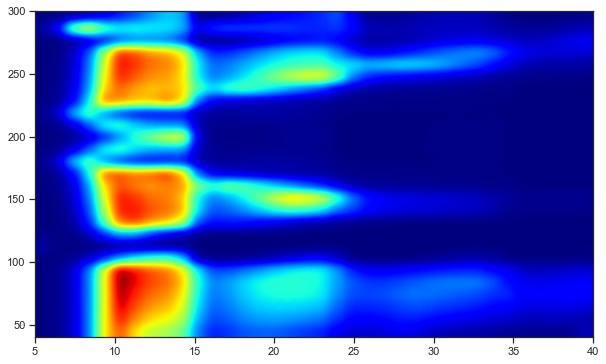

In [85]:
comodulogram(pac.pac_matrix, pac.beta_params, pac.hfo_params)

In [87]:
sig_pac = get_sig_pac()

array([[0.392, 0.394, 0.392, 0.392, 0.392, 0.606, 1.   , 0.502, 0.85 ,
        0.94 , 0.392, 0.392, 0.392, 0.634, 0.902, 0.444, 0.392, 0.42 ,
        0.902, 0.976, 0.774, 0.392, 0.392, 0.446, 0.496, 0.42 , 0.392,
        0.394, 0.894, 0.836, 0.392, 0.392, 0.484, 0.786, 0.648, 0.394],
       [0.392, 0.394, 0.392, 0.392, 0.392, 0.704, 0.984, 0.458, 0.854,
        0.94 , 0.392, 0.392, 0.392, 0.634, 0.892, 0.434, 0.392, 0.392,
        0.894, 0.972, 0.762, 0.392, 0.394, 0.47 , 0.584, 0.412, 0.392,
        0.392, 0.82 , 0.802, 0.392, 0.392, 0.414, 0.604, 0.51 , 0.392],
       [0.392, 0.394, 0.392, 0.392, 0.392, 0.752, 0.908, 0.45 , 0.862,
        0.934, 0.392, 0.392, 0.392, 0.642, 0.896, 0.426, 0.392, 0.392,
        0.892, 0.972, 0.756, 0.392, 0.396, 0.508, 0.57 , 0.408, 0.392,
        0.392, 0.774, 0.788, 0.392, 0.392, 0.452, 0.646, 0.532, 0.392],
       [0.392, 0.394, 0.392, 0.392, 0.392, 0.784, 0.764, 0.454, 0.866,
        0.934, 0.392, 0.392, 0.392, 0.662, 0.9  , 0.424, 0.392, 0.396,
   

In [80]:
pac.pvalues > 0.5

array([[False, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False,  True,  True, False, False, False,
         True,  True,  True, False, False, False, False, False, False,
        False,  True,  True, False, False, False,  True,  True, False],
       [False, False, False, False, False,  True,  True, False,  True,
         True, False, False, False,  True,  True, False, False, False,
         True,  True,  True, False, False, False,  True, False, False,
        False,  True,  True, False, False, False,  True, False, False],
       [False, False, False, False, False,  True,  True, False,  True,
         True, False, False, False,  True,  True, False, False, False,
         True,  True,  True, False, False, False,  True, False, False,
        False,  True,  True, False, False, False,  True,  True, False],
       [False, False, False, False, False,  True,  True, False,  True,
         True, False, False, False,  True,  True, False, False, False,
   